<a href="https://colab.research.google.com/github/greennam/MyGit/blob/master/8_2_k_%ED%8F%89%EA%B7%A0_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


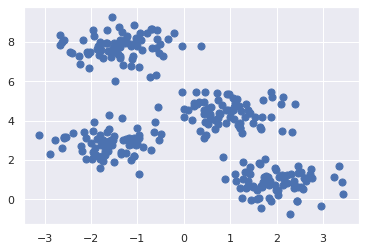

In [2]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
# call model class
from sklearn.cluster import KMeans

In [4]:
# Creat model instance and then set hyper-parameter
kmeans = KMeans(n_clusters=4) # 중심점의 개수를 설정하는 초모수 Hyper-parameter
# 군집 중심의 수를 변경하면서 최적의 군집을 만드는 군집 중심수를 찾음

In [5]:
# 모델 적합
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
# 모델 적용 (예측)
y_kmeans = kmeans.predict(X)

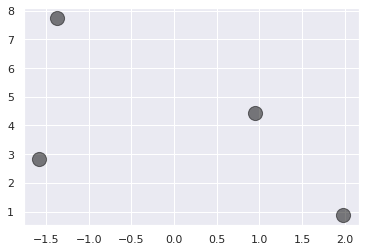

In [7]:
# 군집 중심 시각화
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5 )


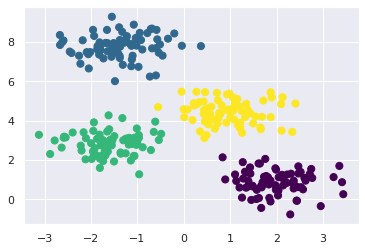

In [8]:
# Visualization
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s = 50, cmap='viridis');

In [9]:
# 원리, 기댓값-최대화 (Expectation-Maximization, E-M)
# 군집 중심을 임의로 추측 > 수렴할때까지 기댓값을 가까운 군집 중심에 할당 
# > 최대화 단계 > 수렴된 군집의 중심을 기준으로 군집을 할당

In [10]:
# 실습 : 손으로 쓴 숫자 데이터 분석
from sklearn.datasets import load_digits
digits = load_digits()

In [16]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
# 수기 숫자 데이터 시각화
#for i in range(3):
#  for j in range(5):
#    ax[i][j].axis('off')
#    ax[i][j].imshow(digits.data[i*4+j].reshape(8,8), cmap='binary')

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 10, random_state= 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

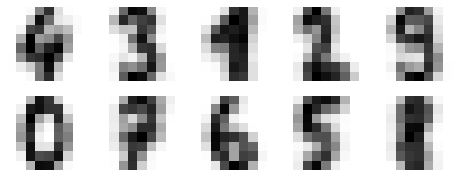

In [18]:
# 군집 분석 시각화
fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.axis('off')
  axi.imshow(center, cmap = plt.cm.binary)